## Exploratory

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#expo">Exploratory</a></li>
        <ol>
            <li><a href="#e1">Univariate</a></li>
            <li><a href="#e2">Bivariate</a></li>
            <li><a href="#e3">Multivariate</a></li>
        </ol>
</ul>

<a id="intro"></a>
## Introduction
This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2006 to 2008. Variable documentation can be found in: http://stat-computing.org/dataexpo/2009/the-data.html

#### Topic: "Performance flights in the United States 2003-2008"
The question want to find in explanatory:
<ol>
    <li>What is total, median, and average flights?</li>
    <li>How far the destination?</li>
    <li>With that destination, what is average time in flights?</li>
    <li>How much ontime, delay, cancelled, and diverted flights?</li>
    <li>How about correlation departure and arrival time?</li>
    <li>How average different elapsed time?</li>
    <li>What is Origin devide by ontime, delay, cancelled, and diverted flights?</li>
    <li>What is reason for delay, cancelled, and diverted flights?</li>
    <li>How about trend delay, cancelled, and diverted flights?</li>
</ol>

#### Read Data Frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# open the data
# if you interest what is clean flights, please open notebook wrangling
df = pd.read_csv("data/clean_flights.csv")
df.head()

Year  Month  DayofMonth  DayOfWeek                    DepTime  \
0  2006      1          11          3  0 days 07:43:00.000000000   
1  2006      1          11          3  0 days 10:53:00.000000000   
2  2006      1          11          3  0 days 19:15:00.000000000   
3  2006      1          11          3  0 days 17:53:00.000000000   
4  2006      1          11          3  0 days 08:24:00.000000000   

                  CRSDepTime                    ArrTime  \
0  0 days 07:45:00.000000000  0 days 10:24:00.000000000   
1  0 days 10:53:00.000000000  0 days 13:13:00.000000000   
2  0 days 19:15:00.000000000  0 days 21:10:00.000000000   
3  0 days 17:55:00.000000000  0 days 19:25:00.000000000   
4  0 days 08:32:00.000000000  0 days 10:15:00.000000000   

                  CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  \
0  0 days 10:18:00.000000000            US        343  ...   45.0     13.0   
1  0 days 13:18:00.000000000            US        613  ...   27.0     19.0   
2  0 days 21:33:00.000000000            US        617  ...    4.0     11.0   
3  0 days 19:33:00.000000000            US        300  ...   16.0     10.0   
4  0 days 10:15:00.000000000            US        765  ...   27.0     12.0   

   Cancelled  CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0          0               NaN         0           0.0           0.0      0.0   
1          0               NaN         0           0.0           0.0      0.0   
2          0               NaN         0           0.0           0.0      0.0   
3          0               NaN         0           0.0           0.0      0.0   
4          0               NaN         0           0.0           0.0      0.0   

  SecurityDelay  LateAircraftDelay  
0           0.0                0.0  
1           0.0                0.0  
2           0.0                0.0  
3           0.0                0.0  
4           0.0                0.0  

[5 rows x 30 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21604865 entries, 0 to 21604864
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ElapsedDelay         float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(13), int64(8), object(9)

<a id="explo"></a>
## Exploratory
<ol>
    <li><a href="#e1">Univariate</a></li>
    <li><a href="#e2">Bivariate</a></li>
    <li><a href="#e3">Multivariate</a></li>
</ol>

<a id="e1"></a>
### Univariate

From question I define in explanatory, I need some univariate for:
<ol>
    <li><a href="#u1">Origin</a></li>
    <li><a href="#u2">Destination</a></li>
    <li><a href="#u3">AirTime</a></li>
    <li><a href="#u4">ArrDelay</a></li>
    <li><a href="#u5">DepDelay</a></li>
    <li><a href="#u6">Cancelled</a></li>
    <li><a href="#u7">Diverted</a></li>
    <li><a href="#u8">ElapsedDelay</a></li>
    <li><a href="#u9">Distance</a></li>
    <li><a href="#u10">CarrierDelay</a></li>
    <li><a href="#u11">WeatherDelay</a></li>
    <li><a href="#u12">NASDelay</a></li>
    <li><a href="#u13">SecurityDelay</a></li>
    <li><a href="#u14">LateAircraftDelay</a></li>
    <li><a href="#u15">Count flight in year</a></li>
    <li><a href="#u16">Count flight in month</a></li>
</ol>

In [4]:
def plot_top_categorical(column, label, rotation=0):
    base_color = sb.color_palette()[0]
    cat_order = df[column].value_counts().head(5).index
    sb.countplot(data = df, x = column, color = base_color, order = cat_order)
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.xticks(rotation = rotation)
    plt.title("Count of Top {}".format(label));

In [5]:
def plot_distribution_and_log(column, title_label, adding_bin, x_label):
    # make space
    plt.figure(figsize = [10,5])

    # figure left
    plt.subplot(1,2,1)
    bin_edges = np.arange(0, df[column].max()+adding_bin,adding_bin)
    plt.hist(data=df, x = column, bins = bin_edges)
    plt.title('Distribution of {}'.format(title_label))
    plt.xlabel(x_label)

    # figure right
    plt.subplot(1,2,2)
    plt.hist(data=df, x = column, bins = bin_edges)
    plt.xscale('log')
    plt.title('Distribution of log({})'.format(title_label))
    plt.xlabel('log({})'.format(x_label));

In [6]:
def plot_pie_chart(sorted_value):
    plt.pie(sorted_value, labels = sorted_value.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
    plt.axis('square');

<a id="u1"></a>
#### 1. Origin

In [7]:
# How much count and unique destination
df['Origin'].describe()

count     21604865
unique         315
top            ATL
freq       1236335
Name: Origin, dtype: object

In [8]:
# what is the top 5 destination
df['Origin'].value_counts().head(5)

ATL    1236335
ORD    1099900
DFW     879789
DEN     714847
LAX     686993
Name: Origin, dtype: int64

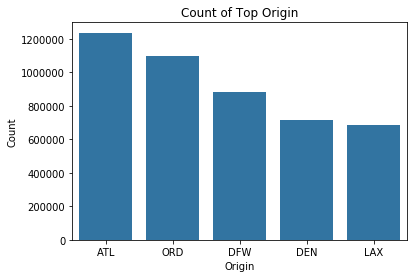

In [9]:
# plot top 5 destination
plot_top_categorical('Origin','Origin')
index = df['Origin'].value_counts().head(5).index

> Total destination is 21604865 with unique destination is 315 destination
<br>
> Top 5 destination is :
1. Atlanta
2. Chicago
3. Dallas
4. Denver
5. Los Angeles

<a id="u2"></a>
#### 2. Destination

In [10]:
# How much count and unique destination
df['Dest'].describe()

count     21604865
unique         321
top            ATL
freq       1233155
Name: Dest, dtype: object

In [11]:
# what is the top 5 destination
df['Dest'].value_counts().head(5)

ATL    1233155
ORD    1099967
DFW     880194
DEN     714593
LAX     687261
Name: Dest, dtype: int64

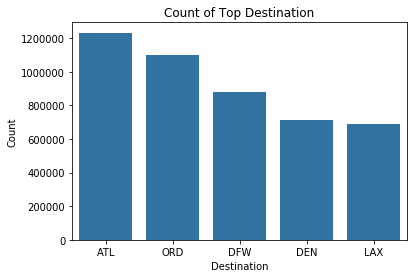

In [12]:
# plot top 5 destination
plot_top_categorical('Dest','Destination')

> Total destination is 21604865 with unique destination is 321 destination
<br>
> Just like Origin, the top 5 destination is :
1. Atlanta
2. Chicago
3. Dallas
4. Denver
5. Los Angeles

<a id="u3"></a>
#### 3. AirTime

In [13]:
# How about stat desc time in flights
df['AirTime'].describe()

count    2.113412e+07
mean     1.032188e+02
std      7.081935e+01
min     -1.425000e+03
25%      5.500000e+01
50%      8.500000e+01
75%      1.310000e+02
max      1.958000e+03
Name: AirTime, dtype: float64

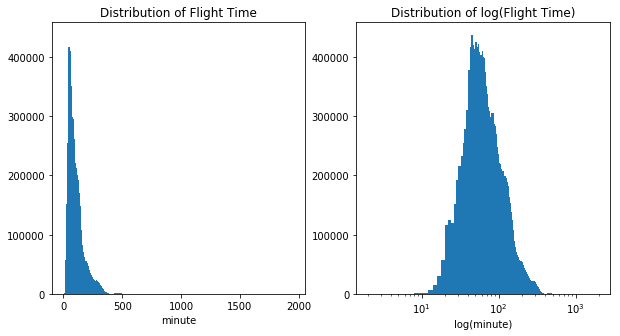

In [14]:
# plot distribution in AirTime with aliases name 'Flight Time', and adding bin 2
# I decide adding bin 2 because log of (q2-q1) is +- 2, so I think it will be in good bin
plot_distribution_and_log('AirTime','Flight Time', 2, 'minute')

> The distribution is right skewed.
<br>
> The log of flight time (in variable AirTime) was normal distribution.

<a id="u4"></a>
#### 4. ArrDelay

In [15]:
# How about stat desc time in arrival delay
df['ArrDelay'].describe()

count    2.113412e+07
mean     9.035575e+00
std      3.816833e+01
min     -5.920000e+02
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.300000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64

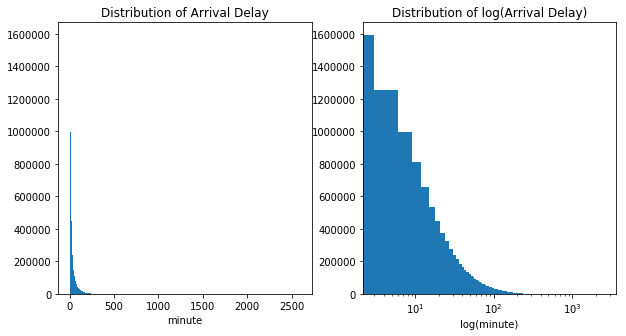

In [16]:
# plot distribution in ArrDelay with aliases name 'Arrival Delay', and adding bin 3
# I decide adding bin 3 because log of (q2-q1) is +- 3, so I think it will be in good bin
plot_distribution_and_log('ArrDelay','Arrival Delay', 3, 'minute')

> The distribution is right skewed.
<br>
> The log of arrival delay still skewed, its mean that delay is not to far with schedule. It sounds good.

<a id="u5"></a>
#### 5. DepDelay

In [17]:
# How about stat desc time in departure delay
df['DepDelay'].describe()

count    2.118594e+07
mean     1.050373e+01
std      3.502096e+01
min     -1.200000e+03
25%     -4.000000e+00
50%      0.000000e+00
75%      9.000000e+00
max      2.601000e+03
Name: DepDelay, dtype: float64

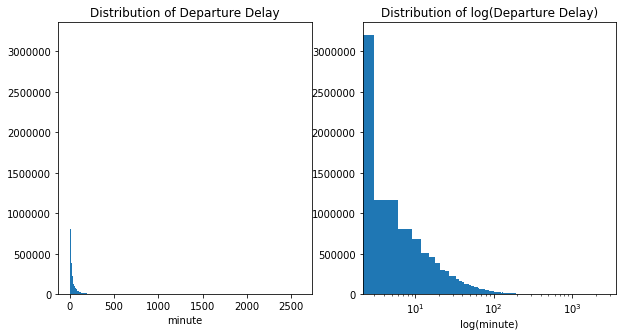

In [18]:
# plot distribution in DepDelay with aliases name 'Departure Delay', and adding bin 3
# I decide adding bin 3 because log of (q2-q1) is +- 3, so I think it will be in good bin
plot_distribution_and_log('DepDelay','Departure Delay', 3, 'minute')

> The distribution is right skewed.
<br>
> Just like arrival delay, the log of derpature delay still skewed, its mean that delay is not to far with schedule. It sounds good.

<a id="u6"></a>
#### 6. Cancelled

In [19]:
# How much flight has been cancelled
df['Cancelled'].value_counts()

0    21184749
1      420116
Name: Cancelled, dtype: int64

In [20]:
len(df.query('Cancelled == 1'))

420116

In [21]:
print("percentage cancelled = {:.2f}%".format(df['Cancelled'].mean() * 100))

percentage cancelled = 1.94%


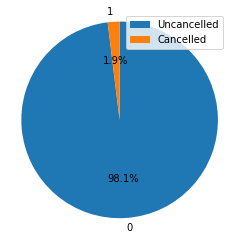

In [22]:
plot_pie_chart(df.Cancelled.value_counts())
plt.legend(['Uncancelled', 'Cancelled'], loc=0);

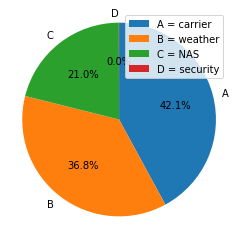

In [23]:
plot_pie_chart(df.CancellationCode.value_counts())
plt.legend(['A = carrier', 'B = weather', 'C = NAS', 'D = security'], loc=0);

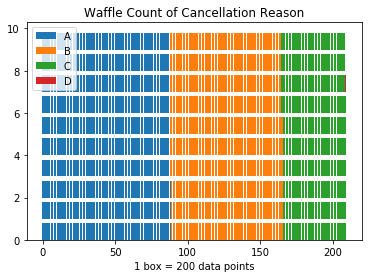

In [24]:
# plot with waffle
# each box represents five full counts
waffle_counts= (df['CancellationCode'].value_counts() / 200).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, loc = 2)
plt.title("Waffle Count of Cancellation Reason")
plt.xlabel("1 box = 200 data points");

> 1.94% of flight was cancelled.
<br>
> The most reason of cancelled is Carrier (unique airline), and security have 0% portion make the flight cancelled. So far its mean the flights was secure. But is not exactly 0% because in waffle plot with 200 point in a box, we still can found 1 red box, so its mean at least 200 data show there is cancellation floghts because of security.

<a id="u7"></a>
#### 7. Diverted

In [25]:
# How much flight has been diverted
df['Diverted'].value_counts()

0    21554235
1       50630
Name: Diverted, dtype: int64

In [26]:
print("percentage diverted = {:.2f}%".format(df['Diverted'].mean() * 100))

percentage diverted = 0.23%


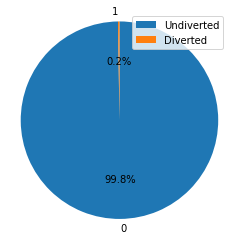

In [27]:
plot_pie_chart(df.Diverted.value_counts())
plt.legend(['Undiverted', 'Diverted'], loc=0);

> 0.2% of flight was diverted

<a id="u8"></a>
#### 8. ElapsedDelay

In [28]:
# How about stat desc time in elapsed delay
df['ElapsedDelay'].describe()

count    2.113412e+07
mean    -1.428183e+00
std      1.426090e+01
min     -1.810000e+02
25%     -9.000000e+00
50%     -3.000000e+00
75%      4.000000e+00
max      1.585000e+03
Name: ElapsedDelay, dtype: float64

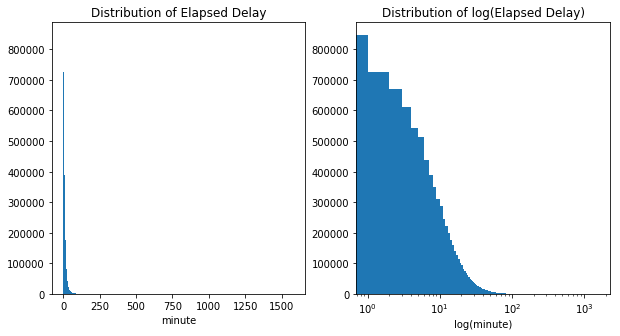

In [29]:
# plot distribution in ElapsedDelay with aliases name 'Elapsed Delay', and adding bin 1
# I decide adding bin 1 because log of (q2-q1) is +- 1, so I think it will be in good bin
plot_distribution_and_log('ElapsedDelay','Elapsed Delay', 1, 'minute')

> Just like arrival delay, the distribution of elapsed delay is right skewed.
<br>
> After scalling with log, the distribution still skewed, its mean that arrival delay is not to far with schedule. It sounds good.

<a id="u9"></a>
#### 9. Distance

In [30]:
# How about stat desc time in distance (miles)
df['Distance'].describe()

count    2.160486e+07
mean     7.246490e+02
std      5.663215e+02
min      1.100000e+01
25%      3.200000e+02
50%      5.760000e+02
75%      9.510000e+02
max      4.962000e+03
Name: Distance, dtype: float64

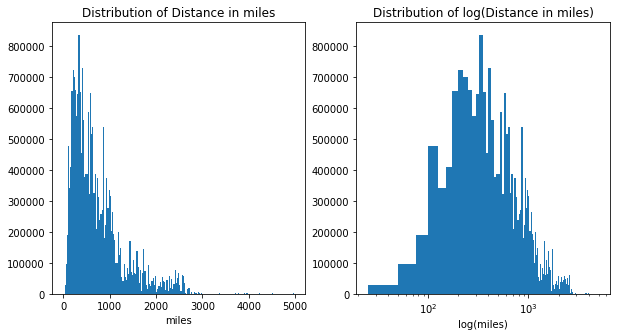

In [31]:
# plot distribution in Distance , and adding bin 25
plot_distribution_and_log('Distance','Distance in miles', 25, 'miles')

> The distribution is right skewed.
<br>
> But with log scale, the distance was normal distribution.

<a id="u10"></a>
#### 10. CarrierDelay

In [32]:
# How much time carrier delay (minute)
df['CarrierDelay'].describe() 

count    1.611987e+07
mean     4.783657e+00
std      2.285184e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.580000e+03
Name: CarrierDelay, dtype: float64

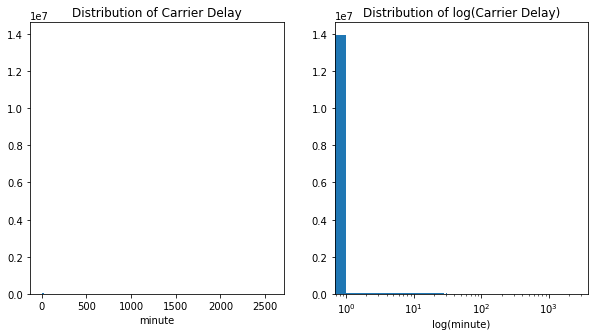

In [33]:
# plot distribution in carrier delay , and adding bin 1
plot_distribution_and_log('CarrierDelay','Carrier Delay', 1, 'minute')

> The distribution is right skewed.
<br>
> After scalling with log, the distribution still skewed, its mean that carrier delay is not need much minutes. It sounds good.

<a id="u11"></a>
#### 11. WeatherDelay

In [34]:
# How much time WeatherDelay (minute)
df['WeatherDelay'].describe() 

count    1.611987e+07
mean     9.446234e-01
std      1.054409e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.429000e+03
Name: WeatherDelay, dtype: float64

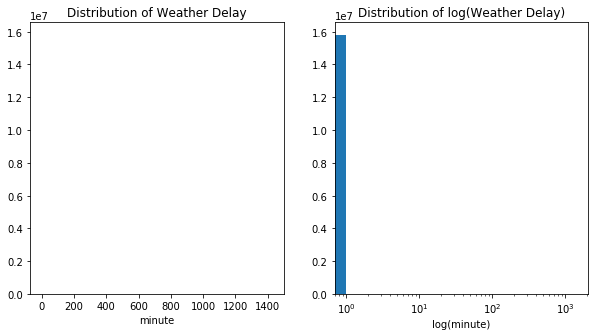

In [35]:
# plot distribution in weather delay , and adding bin 1
plot_distribution_and_log('WeatherDelay','Weather Delay', 1, 'minute')

> Just like carrier delay, the distribution of weather delay is right skewed.
<br>
> After scalling with log, the distribution still skewed, its mean that weather delay is not need much minutes. It sounds good.

<a id="u12"></a>
#### 12. NASDelay

In [36]:
# How much time WeatherDelay (minute)
df['NASDelay'].describe() 

count    1.611987e+07
mean     4.961762e+00
std      1.846588e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.392000e+03
Name: NASDelay, dtype: float64

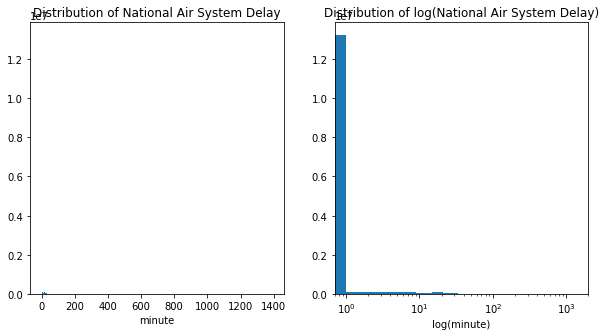

In [37]:
# plot distribution in weather delay , and adding bin 1
plot_distribution_and_log('NASDelay','National Air System Delay', 1, 'minute')

> Just like another delay, the distribution of weather delay is right skewed.
<br>
> After scalling with log, the distribution still skewed, its mean that National Air System Delay is not need much minutes. It sounds good.

<a id="u13"></a>
#### 13. SecurityDelay

In [38]:
# How much time WeatherDelay (minute)
df['SecurityDelay'].describe() 

count    1.611987e+07
mean     3.179883e-02
std      1.259984e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.920000e+02
Name: SecurityDelay, dtype: float64

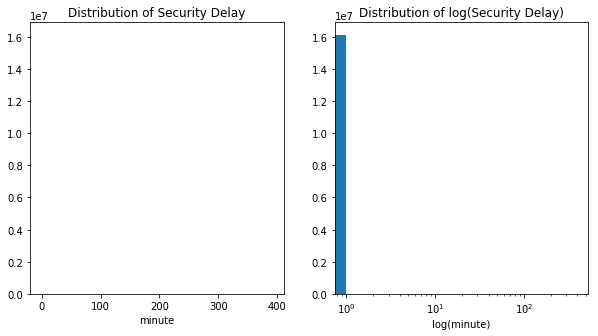

In [39]:
# plot distribution in weather delay , and adding bin 1
plot_distribution_and_log('SecurityDelay','Security Delay', 1, 'minute')

> Just like carrier delay, the distribution of NAS delay is right skewed.
<br>
> After scalling with log, the distribution still skewed, its mean that weather delay is not need much minutes. It sounds good.

<a id="u14"></a>
#### 14. LateAircraftDelay

In [40]:
# How much time WeatherDelay (minute)
df['LateAircraftDelay'].describe() 

count    1.611987e+07
mean     6.322693e+00
std      2.348937e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.366000e+03
Name: LateAircraftDelay, dtype: float64

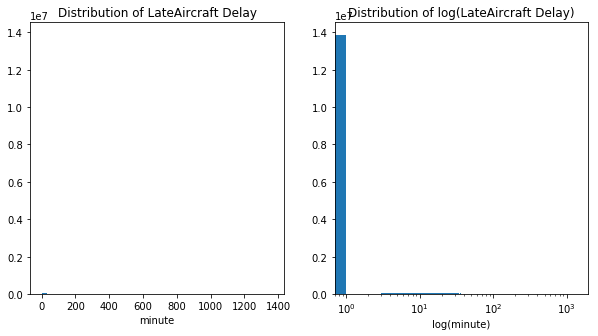

In [41]:
# plot distribution in weather delay , and adding bin 1
plot_distribution_and_log('LateAircraftDelay','LateAircraft Delay', 1, 'minute')

> Just like another delay, the distribution of Late Aircraft Delay delay is right skewed.
<br>
> After scalling with log, the distribution still skewed, its mean that Late Aircraft Delay is not need much minutes. It sounds good.

<a id="u15"></a>
#### 15. Count flight in year

In [42]:
# How much count flight in a year
df['Year'].value_counts()

2007    7453215
2006    7141922
2008    7009728
Name: Year, dtype: int64

In [43]:
# average flight in a yeas
df['Year'].value_counts().mean()

7201621.666666667

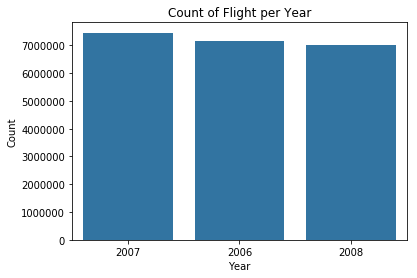

In [44]:
# plot count flight in year
base_color = sb.color_palette()[0]
cat_order = df['Year'].value_counts().index

sb.countplot(data = df, x = 'Year', color = base_color, order = cat_order)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Count of Flight per Year");

> 2007 have large flight than 2006 and 2008
<br>
> Suprisingly, number of flight in 2008 are sortest (than 2006, 2007)
<br>
> Average number of flights in a year is 7201621

<a id="u16"></a>
#### 16. Count flight in month

In [45]:
# How much count flight in a month
df['Month'].value_counts() 

7     1897735
8     1894290
3     1860516
5     1840821
6     1836260
1     1808611
4     1798125
10    1797915
12    1763855
9     1726032
11    1714618
2     1666087
Name: Month, dtype: int64

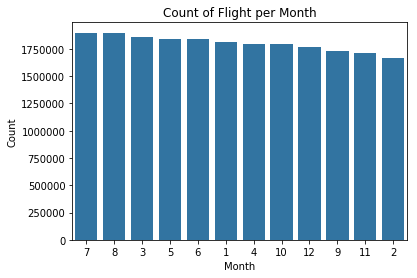

In [46]:
# plot count flight in year
base_color = sb.color_palette()[0]
cat_order = df['Month'].value_counts().index

sb.countplot(data = df, x = 'Month', color = base_color, order = cat_order)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title("Count of Flight per Month");

> In 3 years (2006-8), the most large count of flight is in July or Augustust
<br>
> The least count of flight is February

<a id="e2"></a>
### Bivariate

From question I define in explanatory, I need some bivariate for:
<ol>
    <li><a href="#b2">Year and month vs origin</a></li>
    <li><a href="#b3">Year and month vs flight time</a></li>
    <li><a href="#b4">Year and month vs ontime, delay, cancelled, and diverted</a></li>
    <li><a href="#b5">Origin most and least ontime</a></li>
    <li><a href="#b6">Origin most and least delay</a></li>
    <li><a href="#b7">Origin most and least cancelled</a></li>
    <li><a href="#b8">Origin most and least diverted</a></li>
    <li><a href="#b9">Year and month vs cancelled reation</a></li>
    <li><a href="#b10">Trends of ontime, delay, cancelled, and diverted</a></li>
</ol>

In [47]:
data_year = df.groupby('Year')
data_month = df.groupby('Month')

<a id="b1"></a>
#### 1. Count of flight in month group by year

In [48]:
df.groupby('Month').Year.value_counts()

Month  Year
1      2007    621559
       2008    605765
       2006    581287
2      2008    569236
       2007    565604
       2006    531247
3      2007    639209
       2008    616090
       2006    605217
4      2007    614648
       2008    598126
       2006    585351
5      2007    631609
       2008    606293
       2006    602919
6      2007    629280
       2008    608665
       2006    598315
7      2007    648560
       2008    627931
       2006    621244
8      2007    653279
       2006    628732
       2008    612279
9      2007    600187
       2006    584937
       2008    540908
10     2007    629992
       2006    611718
       2008    556205
11     2007    605149
       2006    586197
       2008    523272
12     2007    614139
       2006    604758
       2008    544958
Name: Year, dtype: int64

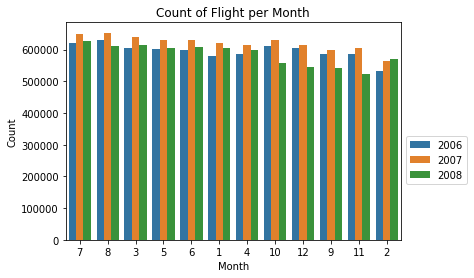

<Figure size 864x360 with 0 Axes>

In [49]:
# plot count flight in year
cat_order = df['Month'].value_counts().index

sb.countplot(data = df, x = 'Month', order = cat_order, hue='Year');
plt.xlabel('Month');
plt.ylabel('Count');
plt.title("Count of Flight per Month");
plt.legend(loc=2, bbox_to_anchor=(1, 0.5));
plt.figure(figsize=(12,5));

In [50]:
# group by year, average number flight in a month
df.groupby('Year').Month.value_counts().mean()

600135.1388888889

> Just like the univariate plot, the average year that have largest number of flight is 2007 
<br>
> Suprisingly, number of flight in 2008 are sortest (than 2006, 2007)
<br>
> Average number of flight in a month in a year is 600135

<a id="b2"></a>
#### 2. Year and month vs origin

In [51]:
# make top 3 origin in year
value = df['Origin'].groupby(df['Year']).value_counts()
value_year = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)
value_year

Year  Origin
2006  ATL       407971
      ORD       373736
      DFW       301163
2007  ATL       413851
      ORD       375784
      DFW       297345
2008  ATL       414513
      ORD       350380
      DFW       281281
Name: Origin, dtype: int64

In [52]:
# unstack that so it will be like dataframe
unstack = value_year.unstack(fill_value=0)
unstack

Origin     ATL     DFW     ORD
Year                          
2006    407971  301163  373736
2007    413851  297345  375784
2008    414513  281281  350380

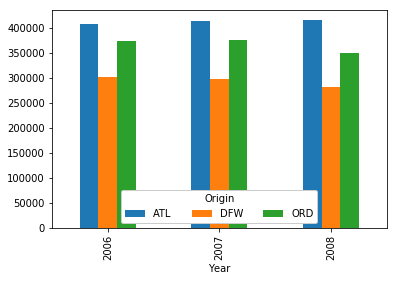

In [53]:
# plot that
unstack.plot(kind = 'bar', sort_columns='Origin');
plt.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Origin');

In [54]:
def plot_time_vs_column(time, column, nlargest=3):
    # group by time, check nlargest value count
    value = df[column].groupby(df[time]).value_counts()
    value_year = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)

    # to make easy plot, change into unstack and plot it
    # unfoturnatly, value in unstack is ordered by column name
    unstack = value_year.unstack(fill_value=0)
    unstack.plot(kind = 'bar', sort_columns=column);
    plt.legend(loc = 0, ncol = 3, framealpha = 1, title = column);

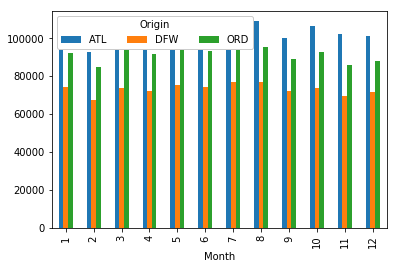

In [55]:
# plot for month
plot_time_vs_column('Month','Origin');

<a id="b3"></a>
#### 3. Year and month vs flight time

From https://www.travelandleisure.com/airlines-airports/shortest-national-flight-records?source=dam, the minimum flight is 16 minutes. So I will used the data which AirTime >= 16 minutes.

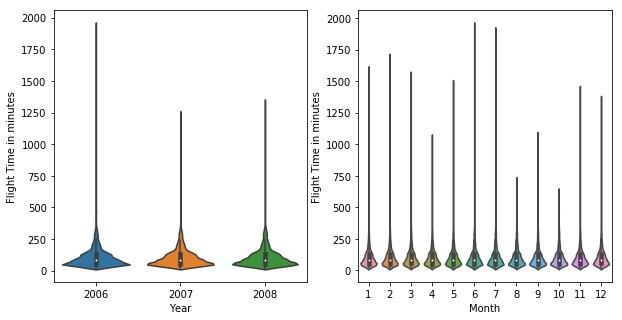

In [56]:
plt.figure(figsize = [10,5])

# plot year (left)
plt.subplot(1,2,1)
sb.violinplot(data=df.query('Cancelled == 0 & Diverted == 0 & AirTime >= 16'), x = 'Year', y = 'AirTime')
plt.ylabel('Flight Time in minutes');


# plot month (right)
plt.subplot(1,2,2)
sb.violinplot(data=df.query('Cancelled == 0 & Diverted == 0 & AirTime >= 16'), x = 'Month', y = 'AirTime')
plt.ylabel('Flight Time in minutes');

<a id="b4"></a>
#### 4. Year and month vs ontime, delay, cancelled, and diverted

From https://en.wikipedia.org/wiki/Flight_cancellation_and_delay, the flight is delay if the different is lower than 25 minutes. So I assumed the flights is on time when the air flight < 25 minutes.

In [57]:
# add isOntime and isDelay in another DF will help in analysis
data_category = df.copy()

# declare new column with default is False or 0 (numeric will make easier to see the proportion)
data_category['isOntime'] = 0
data_category['isDelay'] = 0

# add isOntime true if departure delay <=25 minutes but not cancelled or diverted
# add isDelay true if departure delay > 25 minutes but not cancelled or diverted
data_category.loc[data_category.query('DepDelay <= 25 & (Cancelled == 0 | Diverted == 0)').index,'isOntime'] = 1
data_category.loc[data_category.query('DepDelay > 25 & (Cancelled == 0 | Diverted == 0)').index,'isDelay'] = 1

data_category[['isOntime','isDelay']].describe()

isOntime       isDelay
count  2.160486e+07  2.160486e+07
mean   8.419162e-01  1.386934e-01
std    3.648196e-01  3.456263e-01
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  0.000000e+00
50%    1.000000e+00  0.000000e+00
75%    1.000000e+00  0.000000e+00
max    1.000000e+00  1.000000e+00

From that stat desc, we can find that proportion flights isOntime = 0.84 and isDelay = 0.14. The another proportion maybe because diverted or cancelled.

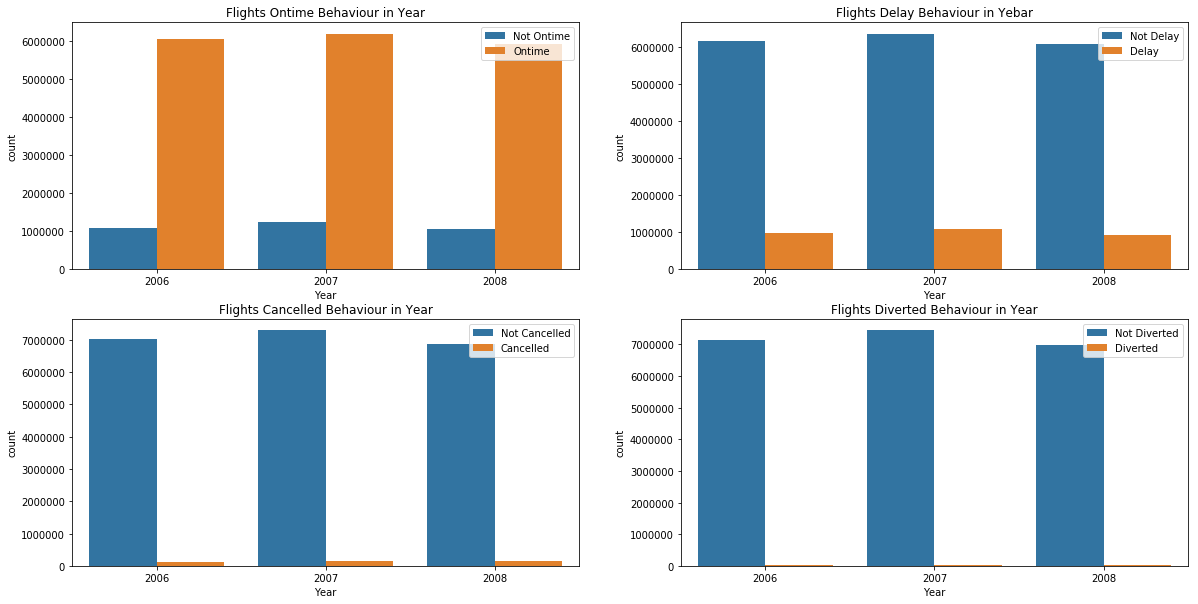

In [58]:
# make plot
plt.figure(figsize = [20,10])

# plot ontime
plt.subplot(2,2,1)
sb.countplot(data=data_category, x = 'Year', hue = 'isOntime');
plt.legend(['Not Ontime', 'Ontime'], loc=0);
plt.title('Flights Ontime Behaviour in Year');

# plot delay
plt.subplot(2,2,2)
sb.countplot(data=data_category, x = 'Year', hue = 'isDelay');
plt.legend(['Not Delay', 'Delay'], loc=0);
plt.title('Flights Delay Behaviour in Yebar');

# plot cancell
plt.subplot(2,2,3)
sb.countplot(data=data_category, x = 'Year', hue = 'Cancelled');
plt.legend(['Not Cancelled', 'Cancelled'], loc=0);
plt.title('Flights Cancelled Behaviour in Year');

# plot diverted
plt.subplot(2,2,4)
sb.countplot(data=data_category, x = 'Year', hue = 'Diverted');
plt.legend(['Not Diverted', 'Diverted'], loc=0);
plt.title('Flights Diverted Behaviour in Year');

From that plot, we can find that in each year flights ontime is largest category behaviour.

<a id="b5"></a>
#### 5. Origin most and least ontime

In [59]:
# make top 3 origin ontime
value = data_category['Origin'].groupby(data_category['isOntime']).value_counts()
value_ontime = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)
value_ontime

isOntime  Origin
0         ORD        277493
          ATL        230946
          DFW        170111
1         ATL       1005389
          ORD        822407
          DFW        709678
Name: Origin, dtype: int64

In [60]:
# unstack that so it will be like dataframe
unstack_ontime = value_ontime.unstack(fill_value=0)
unstack_ontime

Origin        ATL     DFW     ORD
isOntime                         
0          230946  170111  277493
1         1005389  709678  822407

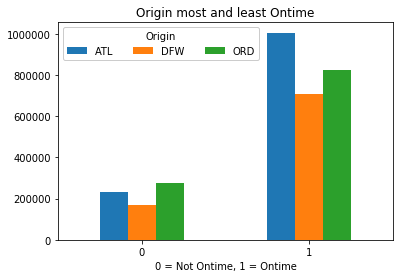

In [61]:
# plot that
unstack_ontime.plot(kind = 'bar', sort_columns='Origin');
plt.legend(loc = 0, ncol = 3, framealpha = 1, title = 'Origin');
plt.xticks(rotation=0)
plt.xlabel('0 = Not Ontime, 1 = Ontime')
plt.title('Origin most and least Ontime');

The value is same for top 3 most and least ontime, maybe because a lot of flights to that origin. So from 321 origin, the top 3 was always them.

<a id="b6"></a>
#### 6. Origin most and least delay

In [62]:
# make function so it can be reusable
def plot_most_and_least(category, label):
    value = data_category['Origin'].groupby(data_category[category]).value_counts()
    value_data = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)
    
    unstack = value_data.unstack(fill_value=0)
    
    unstack.plot(kind = 'bar', sort_columns='Origin');
    plt.legend(loc = 0, ncol = 3, framealpha = 1, title = 'Origin');
    plt.xticks(rotation=0)
    plt.xlabel('0 = Not {}, 1 = {}'.format(label,label))
    plt.title('Origin most and least {}'.format(label));

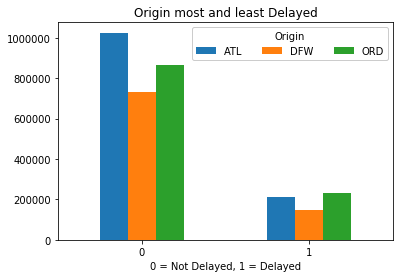

In [63]:
plot_most_and_least('isDelay', 'Delayed');

<a id="b7"></a>
#### 7. Origin most and least cancelled

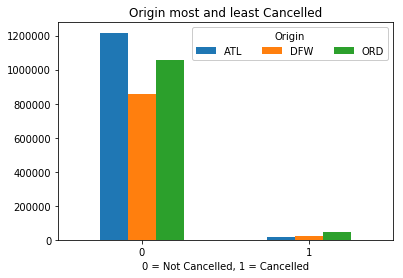

In [64]:
plot_most_and_least('Cancelled', 'Cancelled');

<a id="b8"></a>
#### 8. Origin most and least diverted

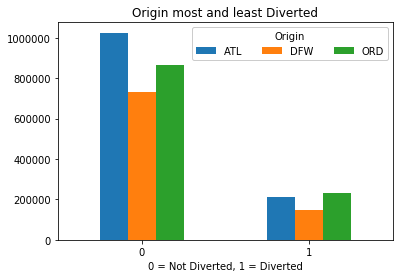

In [65]:
plot_most_and_least('isDelay', 'Diverted');

Point 5-8 have same value, the top Origin in each category is ATL which the category true or not. Note that I try to order the unstack by count, but I can't order them (yet).

<a id="b9"></a>
#### 9. Year and month vs cancelled reation

In [66]:
df.loc[df['CancellationCode']=='A','CancellationCode'] = 'carrier'
df.loc[df['CancellationCode']=='B','CancellationCode'] = 'weather'
df.loc[df['CancellationCode']=='C','CancellationCode'] = 'NAS'
df.loc[df['CancellationCode']=='D','CancellationCode'] = 'security'

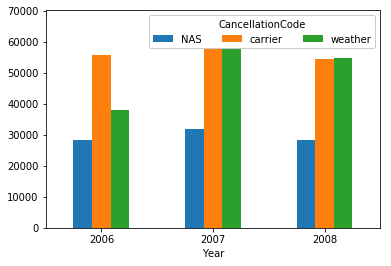

In [67]:
# plot for month
plot_time_vs_column('Year','CancellationCode')
plt.xticks(rotation=0);

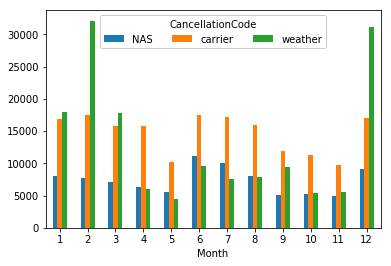

In [68]:
# plot for month
plot_time_vs_column('Month','CancellationCode')
plt.xticks(rotation=0);

A = carrier, B = weather, C = NAS, D = security

Year by year the most cancel reason were carrier. But, if we divide by month, in month desember, january, february, and maret, the most reason is weather.

<a id="b10"></a>
#### 10. Trends of ontime, delay, cancelled, and diverted

In [69]:
def plot_trend(column, label):
    sb.lineplot(data=data_category, x = 'Year', y = column);
    plt.legend(['Not {}'.format(label), '{}'.format(label)], loc=0);
    plt.title('Flights {} Behaviour in Year'.format(label));

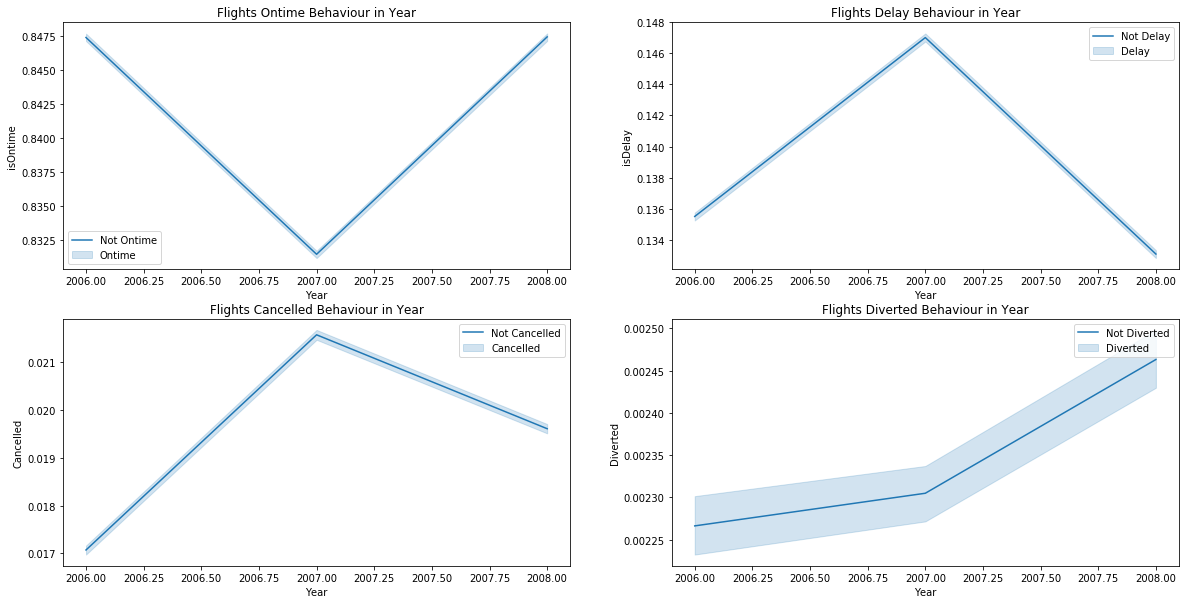

In [70]:
# make plot
plt.figure(figsize = [20,10])

# plot ontime
plt.subplot(2,2,1)
plot_trend('isOntime', 'Ontime');

# plot Delay
plt.subplot(2,2,2)
plot_trend('isDelay', 'Delay');

# plot cancell
plt.subplot(2,2,3)
plot_trend('Cancelled', 'Cancelled');

# plot diverted
plt.subplot(2,2,4)
plot_trend('Diverted', 'Diverted');

<a id="e3"></a>
### Multivariate

From question I define in explanatory, I need some bivariate for:
<ol>
    <li><a href="#m1">Departure Delay vs Arrival Delay in each Year</a></li>
    <li><a href="#m2">Elapsed Delay vs Arrival Delay in each Year</a></li>
</ol>

<a id="m1"></a>
#### 1. ArrDelay vs DepDelay in each Year

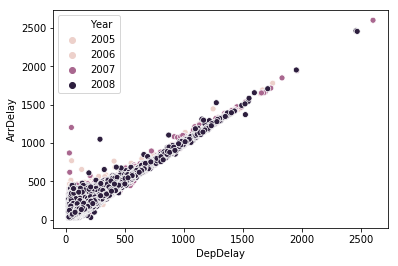

In [71]:
sb.scatterplot(data=data_category.query('DepDelay > 25 & ArrDelay > 25 & Year >= 2006'), x= 'DepDelay', y='ArrDelay', hue='Year');

<a id="m2"></a>
#### 2. Elapsed Delay vs Arrival Delay in each Year

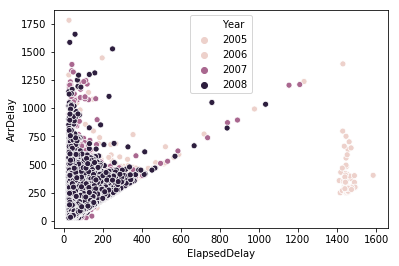

In [72]:
sb.scatterplot(data=data_category.query('ElapsedDelay > 25 & ArrDelay > 25 & Year >= 2006'), x= 'ElapsedDelay', y='ArrDelay', hue='Year');

### Save The Data

In [73]:
data_category.to_csv('data/flights_with_category.csv')